# **YES BANK STOCK PRICE PREDICTION**

# PROJECT TYPE

USE OF SUPERVISED LEARNING TECHNIQUE FOR PRICE PREDICTION AND ALSO EDA FOR THE UNDERSTANDING OF DATA

CONTRIBUTION:HARNAIK SINGH SAHNI


PROJECT SUMMARY:

Objective

    --Predict stock closing prices using historical financial data and machine learning techniques.
    --Develop an accurate regression model that generalizes well to unseen data while minimizing prediction errors.

Data Cleaning & Preprocessing

    --Removed outliers using the Interquartile Range (IQR) method to eliminate extreme values.
    --Applied log transformation to handle skewness and ensure normally distributed features.
    --Scaled features using StandardScaler to maintain consistency across different models.
    --Split the dataset into 80% training and 20% testing sets for evaluation.


Models Implemented & Performance Analysis


    --Linear Regression: Used as a baseline model.
    --Decision Tree Regressor: Captured nonlinear relationships but was prone to overfitting.
    --XGBoost Regressor: Showed strong predictive accuracy with ensemble learning.


Hyperparameter Tuning


    --Decision Tree Regressor: Tuned max_depth, min_samples_split, and min_samples_leaf to reduce overfitting.
    --XGBoost Regressor: Optimized learning_rate, n_estimators, max_depth, subsample, and colsample_bytree to improve accuracy.

Import basic Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/data_YesBank_StockPrices.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
data.shape

(185, 5)

In [ ]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


check the skewness in the numric datype columns


In [ ]:
#select numeric columns
num_cols = data.select_dtypes(include=['float64']).columns.tolist()
num_cols

['Open', 'High', 'Low', 'Close']

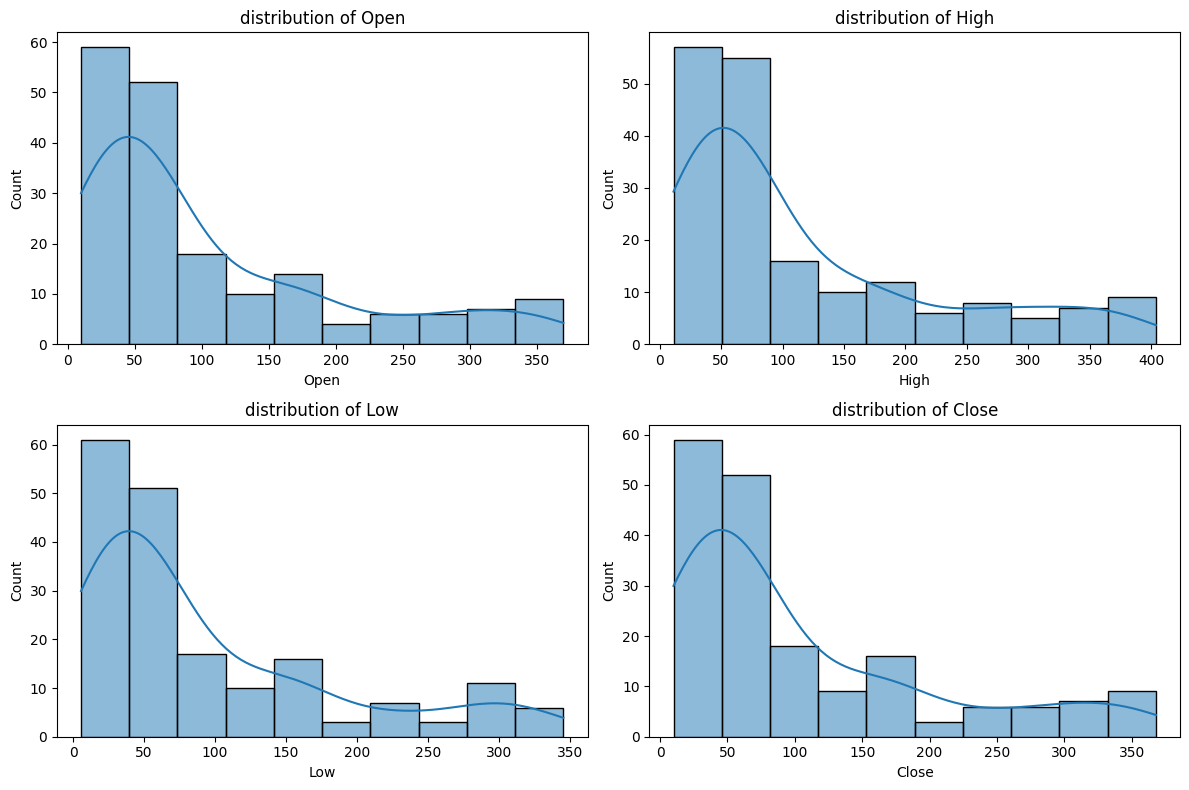

In [ ]:
#create subplots
fig,axes = plt.subplots(2,2,figsize=(12,8))
axes = axes.flatten()

for i,col in enumerate(num_cols):
  sns.histplot(data[col],kde=True,bins=10,ax=axes[i])
  axes[i].set_title(f"distribution of {col}")

plt.tight_layout()
plt.show()

we have create distribution plot for all the numeric columns and we got to know the data is not normally distributed , they all are right skewed , it means there exist some extreme values
Since data is right skewed
Median < Mean, so to make normal distribution , we can use Log transformation

In [ ]:
# Calculate skewness for each column
skew_values = data[num_cols].skew()

# Display skewness values
print(skew_values)

Open     1.265717
High     1.229027
Low      1.303268
Close    1.264725
dtype: float64


In [ ]:
#check relation between the numeric columns how they are correlated
##we can use pairplots and correlatin heat maps

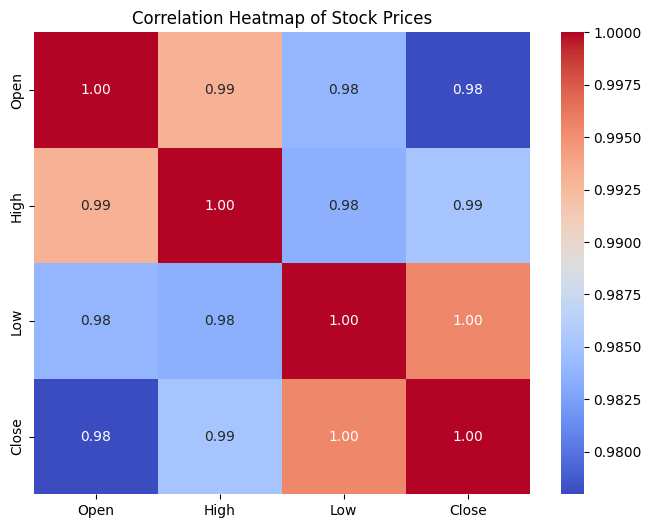

In [ ]:
# Compute correlation matrix
correlation = data[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Stock Prices")
plt.show()


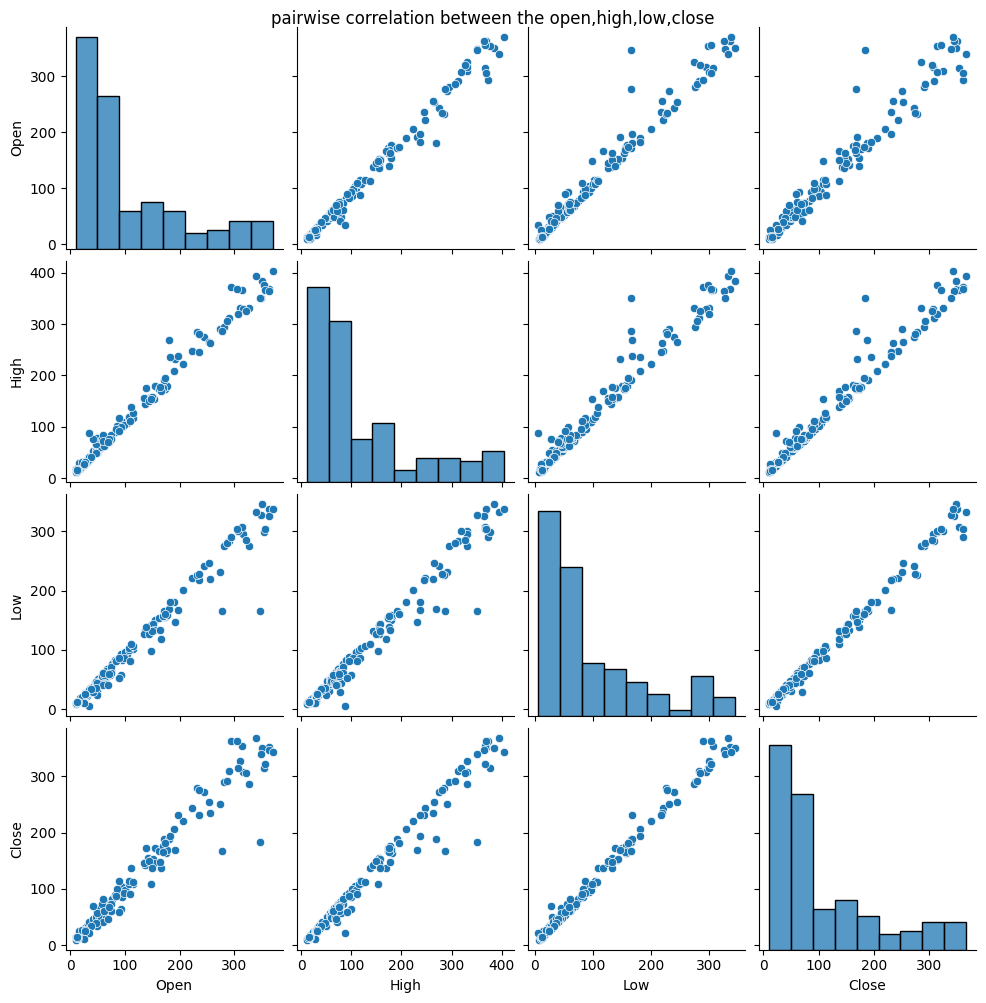

In [ ]:
#use pairplot
sns.pairplot(data[num_cols])
plt.suptitle("pairwise correlation between the open,high,low,close",y=1.0)
plt.show()

from above pairplots and correlation values we got to know that all the values are highly positive correlated
so linear regressin model cannot be used for the prediction as multicollinearity exist in the dataset so wrong prediction can be interpreted

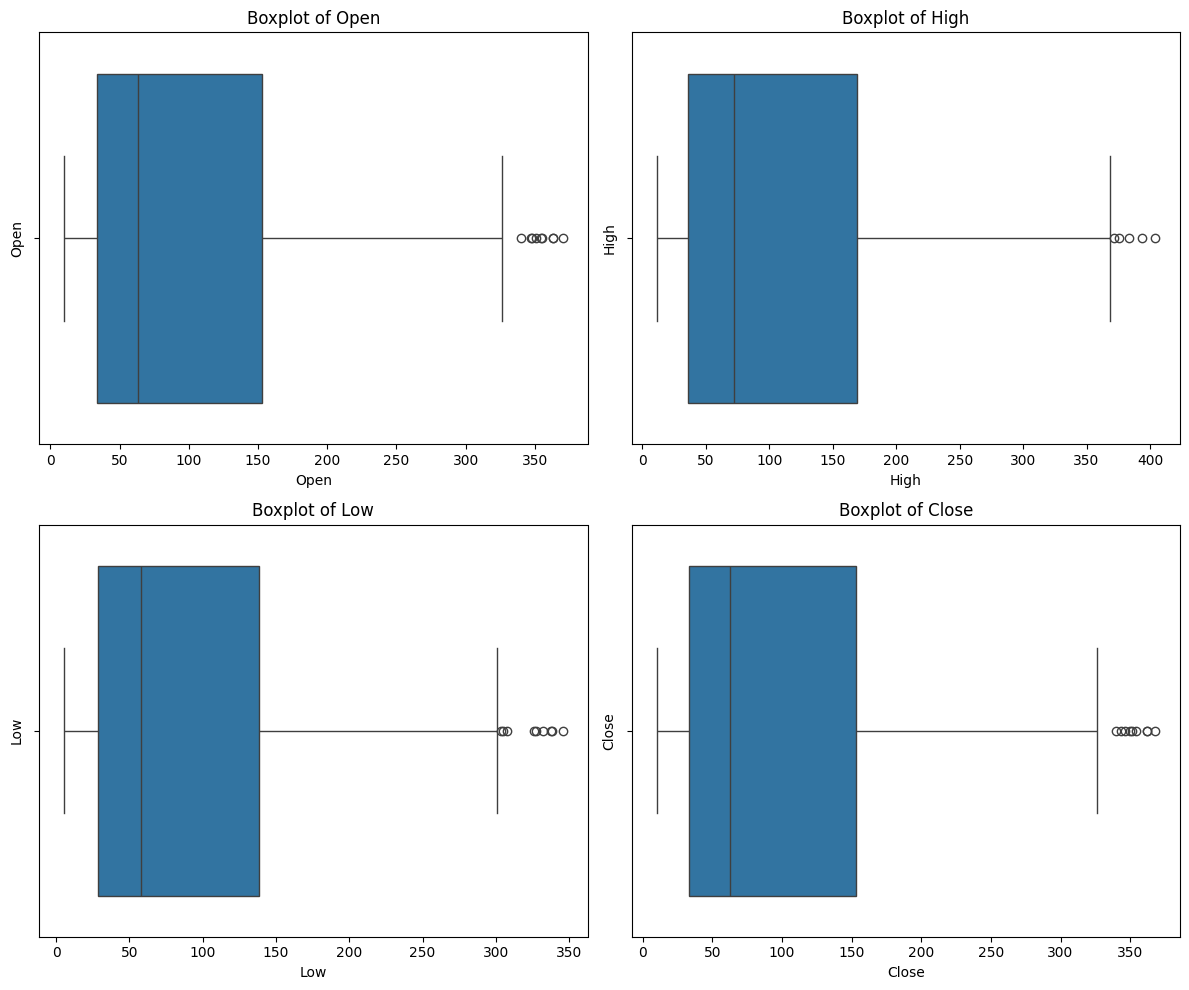

In [ ]:
##Detect outlier in the dataset
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()  # Flatten the array of axes

for i, col in enumerate(num_cols):
    sns.boxplot(x=data[col], ax=axs[i])  # Explicitly use 'x='
    axs[i].set_title(f"Boxplot of {col}")
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
##data cleaning and transformation
##apply log transformation to remove skewness
data[num_cols]=np.log(data[num_cols])

In [ ]:
#remove outliers using IQr as the data is not normally distributed
#in IQR Any value outside Q1 - 1.5IQR or Q3 + 1.5IQR is an outlier.
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR =(Q3-Q1)
#define the bounds
lower_bound = Q1 -1.5*IQR
upper_bound = Q3 + 1.5*IQR

data = data[~((data[num_cols]<lower_bound)| (data[num_cols]>upper_bound)).any(axis=1)]



In [ ]:
#change date and time format
#extracting month and year from dataset
data["Date"]=pd.to_datetime(data["Date"],format='%b-%y')
data["month"]=data["Date"].dt.month
data["year"]=data["Date"].dt.year

In [ ]:
#remove date column from dataset
data.head()

,Open,High,Low,Close,month,year
0,2.564949,2.639057,2.420368,2.522524,7,2005
1,2.532108,2.700018,2.529721,2.596746,8,2005
2,2.601207,2.699346,2.507157,2.587764,9,2005
3,2.580217,2.672078,2.517696,2.564180,10,2005
4,2.591516,2.630449,2.555676,2.596001,11,2005


In [ ]:
#check for null values
data.isnull().sum().sum()
data.dropna()

,Open,High,Low,Close,month,year
0,2.564949,2.639057,2.420368,2.522524,7,2005
1,2.532108,2.700018,2.529721,2.596746,8,2005
2,2.601207,2.699346,2.507157,2.587764,9,2005
3,2.580217,2.672078,2.517696,2.564180,10,2005
4,2.591516,2.630449,2.555676,2.596001,11,2005
...,...,...,...,...,...,...
180,3.242592,3.342862,2.406945,2.480731,7,2020
181,2.484907,2.842581,2.472328,2.665143,8,2020
182,2.660260,2.730464,2.545531,2.576422,9,2020
183,2.587764,2.639771,2.494032,2.519308,10,2020


splitting the dataset

we will take open,high ,low as independent variable

close as a dependent variable

In [ ]:
#split the data
X=data[['Open','High','Low']]
y=data['Close']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Feature scaling

in this we will transfrom the columns using standard scaler so better convergence can be done

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)  #transform on training data


Implementing Machine Learning model
Regression Model

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
models = {
    "Linear Regression":LinearRegression(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor(),
    "XGBoost":XGBRegressor()
}

results= {}

for name,model in models.items():
    print(f"🔹 Training {name}...")
    #train the model
    model.fit(X_train_scaled,y_train)

    #predictions
    y_test_pred = model.predict(X_test_scaled)
    y_train_pred = model.predict(X_train_scaled)

    #evaluate the model for traing dataset
    train_mae = mean_absolute_error(y_train,y_train_pred)
    train_mse = mean_squared_error(y_train,y_train_pred)
    train_r2 = r2_score(y_train,y_train_pred)
    train_rmse = np.sqrt(train_mse)

    #evaluate the model for testing dataset
    test_mae = mean_absolute_error(y_test,y_test_pred)
    test_mse = mean_squared_error(y_test,y_test_pred)
    test_r2 = r2_score(y_test,y_test_pred)
    test_rmse = np.sqrt(test_mse)



   #store the results
    results[name] = {"Model": name,
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse,
        "Train R²": train_r2,
        "Test R²": test_r2
}
    results_df =pd.DataFrame(results).T

print("All models trained and evaluated")




🔹 Training Linear Regression...
🔹 Training Decision Tree...
🔹 Training Random Forest...
🔹 Training XGBoost...
All models trained and evaluated


In [ ]:
results_df

,Model,Train MAE,Test MAE,Train RMSE,Test RMSE,Train R²,Test R²
Linear Regression,Linear Regression,0.041905,0.065032,0.060873,0.095849,0.996274,0.98881
Decision Tree,Decision Tree,0.0,0.130636,0.0,0.256449,1.0,0.919897
Random Forest,Random Forest,0.02505,0.114402,0.039276,0.198383,0.998449,0.952065
XGBoost,XGBoost,0.001261,0.116926,0.001828,0.167754,0.999997,0.965724


We will use hyperparamter tuning for the models to improve the results

In [ ]:
# we will use grid search cv for hyper parameter tuning

In [ ]:
params_grid = {
    "Decision Tree": {
        "max_depth": [None, 10,3,5],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Random Forest": {
        "n_estimators": [50,100,200],
        "max_depth":[3,5,10]
        },
    "XGBoost":{
        "n_estimators":[50,100,200],
        "learning_rate":[0.01,0.1,0.2],
        "max_depth":[3,5,10]
    }

}
New_results={}

for name,param_grid in params_grid.items():
  #select model
  if name == "Decision Tree":
    model = DecisionTreeRegressor()
  elif name =="Random Forest":
    model = RandomForestRegressor()
  elif name == "XGBoost":
    model = XGBRegressor()
  else:
    raise ValueError(f"Unknown model name: {name}")

  #grid search cv
  grid_search = GridSearchCV(model,param_grid,cv=5,scoring="neg_mean_squared_error")
  grid_search.fit(X_train_scaled,y_train)

  #best model
  best_model = grid_search.best_estimator_
  print(f"Best parameters for {name}: {grid_search.best_params_}")
  print(f"Best score for {name}: {-grid_search.best_score_}")

  # Predictions
  y_train_pred = best_model.predict(X_train_scaled)
  y_test_pred = best_model.predict(X_test_scaled)

    # Training Metrics
  train_mae = mean_absolute_error(y_train, y_train_pred)
  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  train_r2 = r2_score(y_train, y_train_pred)

    # Testing Metrics
  test_mae = mean_absolute_error(y_test, y_test_pred)
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
  test_r2 = r2_score(y_test, y_test_pred)

 # Store results
  New_results[name]={
        "Model": name + " (Tuned)",
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse,
        "Train R²": train_r2,
        "Test R²": test_r2
  }

# Convert to DataFrame
optimized_results_df = pd.DataFrame(New_results).


Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best score for Decision Tree: 0.015248974133980422
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 50}
Best score for Random Forest: 0.009677997789357799
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best score for XGBoost: 0.009950681483593541


In [ ]:
optimized_results_df.T

,Model,Train MAE,Test MAE,Train RMSE,Test RMSE,Train R²,Test R²
Decision Tree,Decision Tree (Tuned),0.024112,0.156005,0.032253,0.267401,0.998954,0.91291
Random Forest,Random Forest (Tuned),0.024957,0.108908,0.03946,0.179633,0.998434,0.960698
XGBoost,XGBoost (Tuned),0.010205,0.119333,0.014101,0.198899,0.9998,0.951815


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Train MAE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Test MAE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Train RMSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Train MAE'].value_counts()
    for x_label, grp in _df_4.groupby('Model')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Model')
_ = plt.ylabel('Train MAE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Test MAE'].value_counts()
    for x_label, grp in _df_5.groupby('Train MAE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Train MAE')
_ = plt.ylabel('Test MAE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Train RMSE'].value_counts()
    for x_label, grp in _df_6.groupby('Test MAE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Test MAE')
_ = plt.ylabel('Train RMSE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Test RMSE'].value_counts()
    for x_label, grp in _df_7.groupby('Train RMSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Train RMSE')
_ = plt.ylabel('Test RMSE')

from matplotlib import pyplot as plt
import seaborn as sns
_df_8.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_9.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('Train MAE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_11.groupby('Test MAE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Model'].value_counts()
    for x_label, grp in _df_12.groupby('index')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('index')
_ = plt.ylabel('Model')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Train MAE'].value_counts()
    for x_label, grp in _df_13.groupby('Model')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Model')
_ = plt.ylabel('Train MAE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Test MAE'].value_counts()
    for x_label, grp in _df_14.groupby('Train MAE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Train MAE')
_ = plt.ylabel('Test MAE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Train RMSE'].value_counts()
    for x_label, grp in _df_15.groupby('Test MAE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Test MAE')
_ = plt.ylabel('Train RMSE')

FINAL VERDICT

FROM ABOVE EVALUATIN TABLE WE GOT TO KNOW THAT

LINEAR REGRESSION HAS THE BEST R2 SCORE EVEN AFTER THE HYPER PARAMETER TUNING FOR THE OTHER REGRESSION PROBLEMS ,
HENCE WE WILL USE LINEAR REGRESSION FOR AUR FURTHER EVALUATION